# Сборный проект: Маркетинг Яндекс.Афиши

---
###### Цель проекта: 

Помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

---

Данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- visits - лог сервера с данными о посещениях сайта Яндекс.Афиши:

    uid — уникальный идентификатор пользователя,
    
    device — категория устройства пользователя,
    
    start_ts — дата и время начала сессии,
    
    end_ts — дата и время окончания сессии,
    
    source_id — идентификатор источника перехода на сайт.
    
    
- orders - выгрузка всех заказов за этот период:

    uid — уникальный идентификатор пользователя,
    
    buy_ts — дата и время заказа,
    
    revenue — сумма заказа.
    
    
- costs - статистика рекламных расходов:

    source_id — идентификатор рекламного источника,
    
    dt — дата проведения рекламной кампании,
    
    costs — расходы на эту кампанию.

Предстоит изучить:

- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Предобработка данных

In [2]:
# visits = pd.read_csv('/Users/dianamini/Developer/Data/visits_log.csv')
# visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

---
- Необходимо заменить типы данных в столбцах End Ts и Start Ts с object на datetime
- Так же привести названия столбцов к нижнему регистру и заменить их на более удобные

---

In [5]:
# orders = pd.read_csv('/Users/dianamini/Developer/Data/orders_log.csv')
# orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

---
- Заменить тип данных в столбце Buy Ts на datetime
- Привести названия столбцов к нижнему регистру, заменить их на более удобные

---

In [8]:
# costs = pd.read_csv('/Users/dianamini/Developer/Data/costs.csv')
# costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

---
- В таблице costs заменить тип данных в столбце dt с object на datetime
---

In [11]:
visits.columns = visits.columns.str.lower()
visits = visits.rename({'end ts': 'end_ts', 'start ts': 'start_ts', 'source id': 'source_id'}, axis=1)
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


---

In [13]:
orders.columns = orders.columns.str.lower()
orders = orders.rename({'buy ts': 'buy_ts'}, axis=1)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


---

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

---

### Вывод

Все таблицы подготовлены для дальнейшего анализа:
- названия столбцов приведены в надлежащий вид
- типы данных заменены на правильные

## Метрики и графики

### Продуктовые метрики

#### Пользовательская активность

In [19]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [20]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date
visits['session_hour'] = visits['start_ts'].dt.hour

visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_hour
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,17
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,16
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,10
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,14


In [21]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('DAU:', int(dau_total))
print('WAU:', int(wau_total))
print('MAU:', int(mau_total))

DAU: 907
WAU: 5621
MAU: 23228


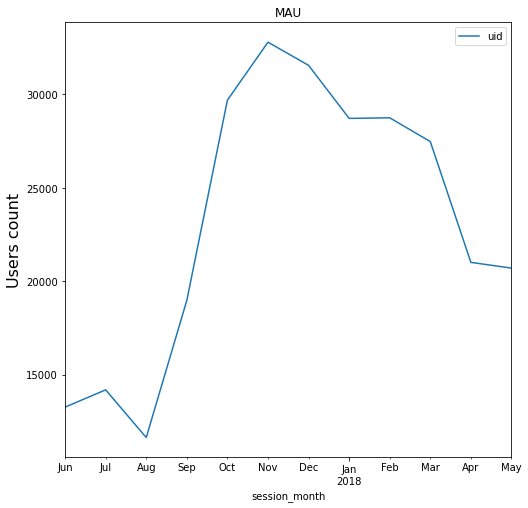

In [22]:
mau = visits.groupby('session_month').agg({'uid': 'nunique'})
mau.plot(figsize = (8,8))
plt.ylabel('Users count',fontsize=16)
plt.title('MAU')
plt.show()

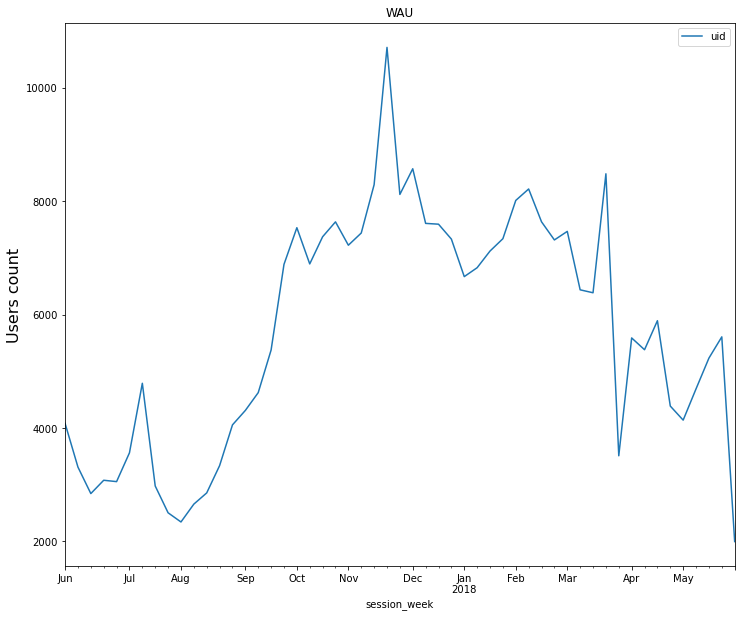

In [23]:
wau = visits.groupby('session_week').agg({'uid': 'nunique'})
wau.plot(figsize = (12,10))
plt.ylabel('Users count',fontsize=16)
plt.title('WAU')
plt.show()

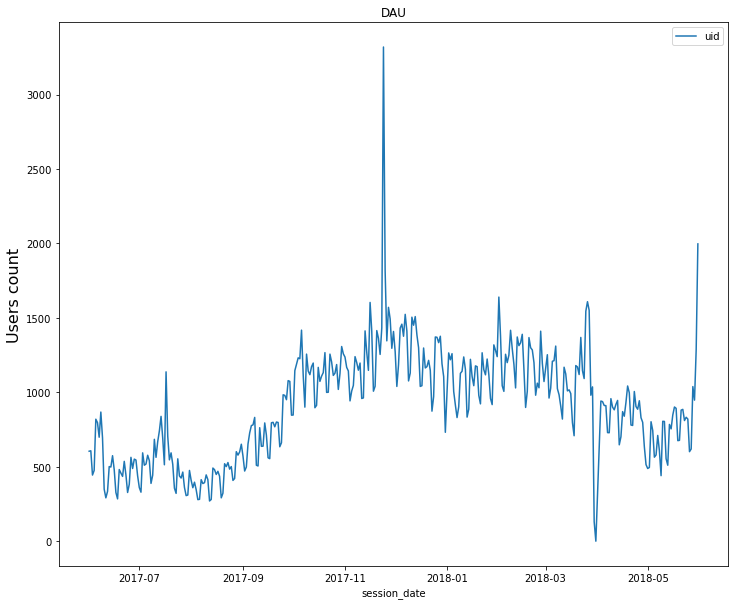

In [24]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
dau.plot(figsize = (12,10))
plt.ylabel('Users count',fontsize=16)
plt.title('DAU')
plt.show()

---
- Анализ пользовательской активности показал,  что больше людей приходит на Яндекс.Афишу в "холодные" месяцы. 

- На графике MAU можно увидеть снижение прихода новых пользователей в июне, июле и августе, а его пик приходится на ноябрь и декабрь. 

- На графике DAU так же заметны скачки в декабре 2017 года и резкий спад прихода новых пользователей в апреле 2018 года.

- Так же на графиках видно общее увеличение количества новых пользователей с сентября 2017 года по март 2018 года.

---

#### Средняя посещаемость сайта в день

In [25]:
attendance_per_day = visits.groupby(['session_date', 'session_hour']).agg({'uid': 'nunique'}).mean()
print('Средняя посещаемость в день:', int(attendance_per_day))

Средняя посещаемость в день: 41


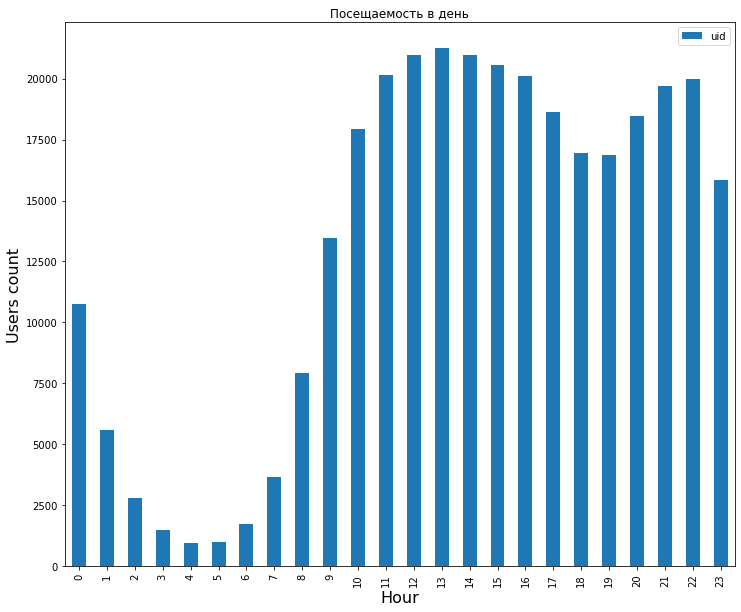

In [26]:
attendance = visits.groupby('session_hour').agg({'uid': 'nunique'})
attendance.plot(kind='bar', figsize = (12,10))
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Users count',fontsize=16)
plt.title('Посещаемость в день')
plt.show()

In [27]:
sessions_per_user = visits.groupby(['session_date', 'session_hour']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

n_sessions  n_users  sess_per_user
session_date session_hour                                    
2017-06-01   0                     16       16       1.000000
             1                      6        6       1.000000
             2                      5        5       1.000000
             3                      2        2       1.000000
             4                      1        1       1.000000
...                               ...      ...            ...
2018-05-31   19                    86       85       1.011765
             20                    95       93       1.021505
             21                   101      101       1.000000
             22                   129      128       1.007812
             23                    85       84       1.011905

[8595 rows x 3 columns]

In [28]:
sess_per_user = sessions_per_user['sess_per_user'].mean()
n_sessions = sessions_per_user['n_sessions'].mean()
print('Среднее количество сессий на одного пользователя в день:', format(sess_per_user, '.2f'))
print('Среднее количество сессий в день:', format(n_sessions, '.2f'))

Среднее количество сессий на одного пользователя в день: 1.01
Среднее количество сессий в день: 41.82


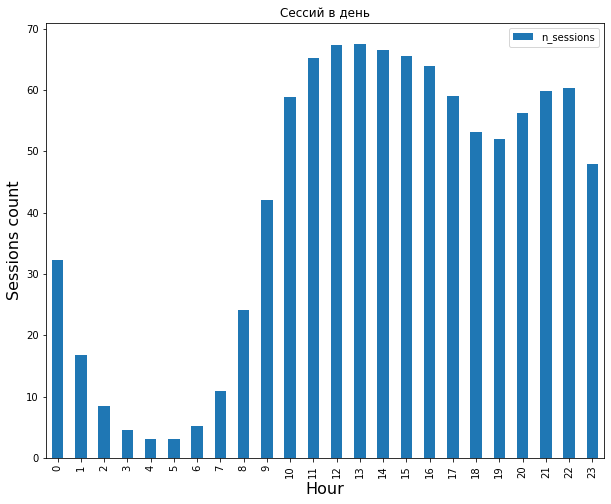

In [29]:
sessions_per_day = sessions_per_user.groupby(['session_hour']).agg({'n_sessions': 'mean'})
sessions_per_day.plot(kind='bar', figsize = (10,8))
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Sessions count',fontsize=16)
plt.title('Сессий в день')
plt.show()

---
- В среднем сайт Яндекс.Афиши посещают 41 человек в день
- Пик посещений приходится на обеденное время (12:00 - 14:00) и на вечернее (21:00 - 22:00)
- В среднем на одного пользователя приходится 1 сессия в день

---

#### Продолжительность пользовательской сессии

In [30]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

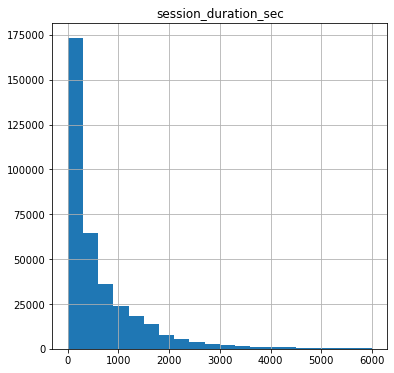

In [31]:
visits.hist('session_duration_sec', bins=20, range = (0, 6000), figsize = (6,6))
plt.show()

In [32]:
seconds_mode = visits['session_duration_sec'].mode()
print('Средняя продолжительность сессии в секундах:', int(seconds_mode))

Средняя продолжительность сессии в секундах: 60


In [33]:
print('Медиана:', visits['session_duration_sec'].median())
print('Среднее:', visits['session_duration_sec'].mean())
print('Мода:', int(visits['session_duration_sec'].mode()))

Медиана: 300.0
Среднее: 643.506488592098
Мода: 60


---
- Так как распределение на графике смещено влево, вместо среднего показателя продолжительности сессии я возьму моду
- В среднем сессия длится 60 секунд

---

#### Коэффициент удержания

In [34]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_hour,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,17,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,16,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,1,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,10,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,14,0


In [35]:
first_visit_date_time = visits.groupby(['uid'])['start_ts'].min()
first_visit_date_time.name = 'first_visit_date_time'
visits = visits.join(first_visit_date_time,on='uid')
visits['first_visit_date'] = visits['first_visit_date_time'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,17,1080,2017-12-20 17:20:00,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,16,1680,2018-02-19 16:53:00,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,1,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,10,1440,2018-03-09 20:05:00,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,14,0,2017-12-27 14:06:00,2017-12-27


In [36]:
visits['first_visit_month'] = visits['first_visit_date_time'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,17,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,16,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,1,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,10,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,14,0,2017-12-27 14:06:00,2017-12-27,2017-12-01,2017-12-01


In [37]:
visits['cohort_lifetime'] = (
    visits['visit_month'] - visits['first_visit_month']
)
visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round()
visits.head()


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,17,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-12-01,0.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,16,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-02-01,0.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,1,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,10,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2018-05-01,2.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,14,0,2017-12-27 14:06:00,2017-12-27,2017-12-01,2017-12-01,0.0


In [38]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [39]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'uid']
]
print(initial_users_count) 

   first_visit_month    uid
0         2017-06-01  13259
12        2017-07-01  13140
23        2017-08-01  10181
33        2017-09-01  16704
42        2017-10-01  25977
50        2017-11-01  27248
57        2017-12-01  25268
63        2018-01-01  22624
68        2018-02-01  22197
72        2018-03-01  20589
75        2018-04-01  15709
77        2018-05-01  15273


In [40]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

In [41]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

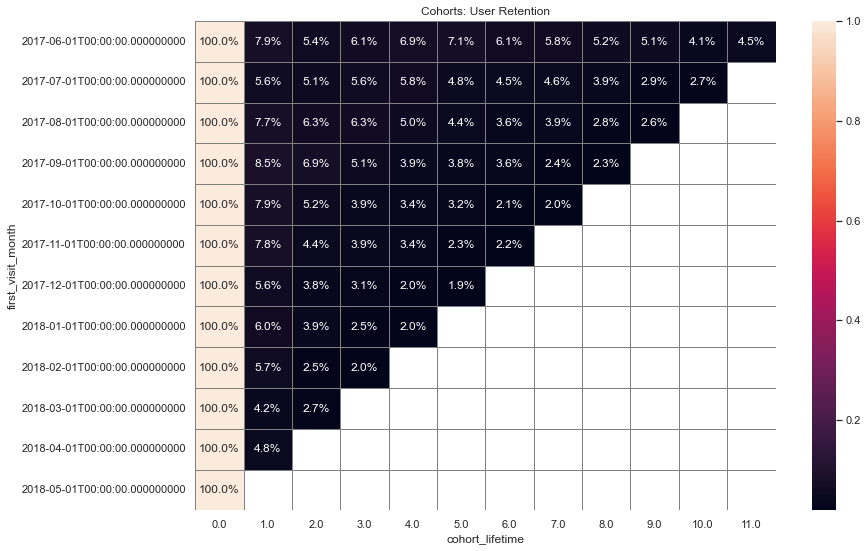

In [42]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

In [43]:
cohort_lifetime_2 = cohorts[cohorts['cohort_lifetime'] == 1]
cohort_lifetime_2 = cohort_lifetime_2['retention'].mean() * 100
print('Средний показатель Retention Rate на второй месяц жизни когорт:', format(cohort_lifetime_2, '.1f'))

Средний показатель Retention Rate на второй месяц жизни когорт: 6.5


---
- Я разделила пользователей на когрты по месяцу первого входа на сайт и расчитала коэффициент удержания для каждой из них по месяцам.
- Судя по тепловой карте показатель Retention Rate снижается не равномерно. Это можно объяснить сезонностью мероприятий, которые предлагает Яндекс.Афиша. 
- В целом наблюдается тенденция снижения показателя Retention Rate.
- Средний показатель Retention Rate на второй месяц жизни когорт: 6.5%. Думаю, что это нормально для второго месяца, так как билеты на мероприятия необходимы не каждый месяц.

---

### Метрики электронной коммерции

#### От первого посещения до покупки

In [44]:
visits_and_orders = visits.set_index('uid').join(orders.set_index('uid'))
visits_and_orders.head()

,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date,first_visit_month,visit_month,cohort_lifetime,buy_ts,revenue
uid,,,,,,,,,,,,,,,,,
9223535092787691177,touch,2017-11-14 20:19:00,4,2017-11-14 20:00:00,2017,2017-11-01,2017-11-09,2017-11-14,20,1140,2017-11-14 08:54:00,2017-11-14,2017-11-01,2017-11-01,0.0,NaT,NaN
9223535092787691177,touch,2017-11-14 09:22:00,1,2017-11-14 08:54:00,2017,2017-11-01,2017-11-09,2017-11-14,8,1680,2017-11-14 08:54:00,2017-11-14,2017-11-01,2017-11-01,0.0,NaT,NaN
9223535092787691177,touch,2017-11-14 11:04:00,4,2017-11-14 10:30:00,2017,2017-11-01,2017-11-09,2017-11-14,10,2040,2017-11-14 08:54:00,2017-11-14,2017-11-01,2017-11-01,0.0,NaT,NaN
9223696655126052404,touch,2017-11-05 17:12:00,3,2017-11-05 17:08:00,2017,2017-11-01,2017-11-02,2017-11-05,17,240,2017-11-05 17:08:00,2017-11-05,2017-11-01,2017-11-01,0.0,NaT,NaN
9223707061355654945,touch,2017-11-01 00:40:00,9,2017-10-31 22:36:00,2017,2017-10-01,2017-10-26,2017-10-31,22,7440,2017-10-31 22:36:00,2017-10-31,2017-10-01,2017-10-01,0.0,2017-10-31 22:56:00,4.64


In [45]:
visits_and_orders = visits_and_orders.dropna()
visits_and_orders.head()

,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date,first_visit_month,visit_month,cohort_lifetime,buy_ts,revenue
uid,,,,,,,,,,,,,,,,,
9223707061355654945,touch,2017-11-01 00:40:00,9,2017-10-31 22:36:00,2017,2017-10-01,2017-10-26,2017-10-31,22,7440,2017-10-31 22:36:00,2017-10-31,2017-10-01,2017-10-01,0.0,2017-10-31 22:56:00,4.64
9223707061355654945,touch,2017-11-02 20:40:00,9,2017-11-02 20:24:00,2017,2017-11-01,2017-11-02,2017-11-02,20,960,2017-10-31 22:36:00,2017-10-31,2017-10-01,2017-11-01,1.0,2017-10-31 22:56:00,4.64
9224005701666002943,desktop,2017-12-26 11:17:00,5,2017-12-26 11:11:00,2017,2017-12-01,2017-12-21,2017-12-26,11,360,2017-12-26 11:11:00,2017-12-26,2017-12-01,2017-12-01,0.0,2017-12-26 11:15:00,3.36
9224005701666002943,desktop,2017-12-26 11:17:00,5,2017-12-26 11:11:00,2017,2017-12-01,2017-12-21,2017-12-26,11,360,2017-12-26 11:11:00,2017-12-26,2017-12-01,2017-12-01,0.0,2018-03-16 17:11:00,3.67
9224005701666002943,desktop,2018-03-15 21:26:00,3,2018-03-15 21:04:00,2018,2018-03-01,2018-03-15,2018-03-15,21,1320,2017-12-26 11:11:00,2017-12-26,2017-12-01,2018-03-01,3.0,2017-12-26 11:15:00,3.36


In [46]:
visits_and_orders['from_first_visit_to_buy'] = (visits_and_orders['buy_ts'] - visits_and_orders['start_ts']).dt.seconds
visits_and_orders.head()

,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date,first_visit_month,visit_month,cohort_lifetime,buy_ts,revenue,from_first_visit_to_buy
uid,,,,,,,,,,,,,,,,,,
9223707061355654945,touch,2017-11-01 00:40:00,9,2017-10-31 22:36:00,2017,2017-10-01,2017-10-26,2017-10-31,22,7440,2017-10-31 22:36:00,2017-10-31,2017-10-01,2017-10-01,0.0,2017-10-31 22:56:00,4.64,1200
9223707061355654945,touch,2017-11-02 20:40:00,9,2017-11-02 20:24:00,2017,2017-11-01,2017-11-02,2017-11-02,20,960,2017-10-31 22:36:00,2017-10-31,2017-10-01,2017-11-01,1.0,2017-10-31 22:56:00,4.64,9120
9224005701666002943,desktop,2017-12-26 11:17:00,5,2017-12-26 11:11:00,2017,2017-12-01,2017-12-21,2017-12-26,11,360,2017-12-26 11:11:00,2017-12-26,2017-12-01,2017-12-01,0.0,2017-12-26 11:15:00,3.36,240
9224005701666002943,desktop,2017-12-26 11:17:00,5,2017-12-26 11:11:00,2017,2017-12-01,2017-12-21,2017-12-26,11,360,2017-12-26 11:11:00,2017-12-26,2017-12-01,2017-12-01,0.0,2018-03-16 17:11:00,3.67,21600
9224005701666002943,desktop,2018-03-15 21:26:00,3,2018-03-15 21:04:00,2018,2018-03-01,2018-03-15,2018-03-15,21,1320,2017-12-26 11:11:00,2017-12-26,2017-12-01,2018-03-01,3.0,2017-12-26 11:15:00,3.36,51060


<AxesSubplot:>

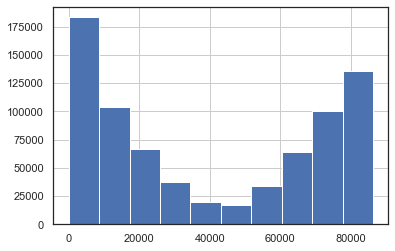

In [47]:
visits_and_orders['from_first_visit_to_buy'].hist()

In [48]:
from_visit_to_order = visits_and_orders['from_first_visit_to_buy'].mode()
print('С первого захода на сайт до первой покупки проходит в среднем', int(from_visit_to_order), 'секунд.')

С первого захода на сайт до первой покупки проходит в среднем 60 секунд.


---
- Обычно пользователь совершает покупку с первого же захода на сайт и тратит на это 1 минуту
- Так как распределение не нормальное, то я выбрала показатель моды, вместо медианы


- Есть странный момент. При высчитавании разницы в днях, а не в секундах, появляются отрицательные значения (и это понятно, там больше половины строк с ошибками в датах, первая покупка на много раньше первого захода на сайт). Но при расчете в секундах отрицательных чисел нет. Но я решила расчитать в секундах, так как результат получается более детальный. А отрицательные значения в днях я бы все равно перевела в положительные.

---

#### Покупки одного покупателя

In [49]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [50]:
first_order_date_by_users = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_users.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

In [51]:
first_order_date_by_users.name = 'first_order_date'

In [52]:
orders = orders.join(first_order_date_by_users, on='uid')
orders.head()

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [53]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [54]:
all_cohorts = orders.groupby('first_order_month').agg({'uid': ['count', 'nunique'], 'revenue': 'sum'})
all_cohorts.columns = ['n_orders', 'n_users', 'revenue']
all_cohorts

,n_orders,n_users,revenue
first_order_month,,,
2017-06-01,4438,2023,24031.69
2017-07-01,2910,1923,16127.92
2017-08-01,2188,1370,11606.26
2017-09-01,3878,2581,34676.32
2017-10-01,6005,4340,27603.45
2017-11-01,5900,4081,26098.99
2017-12-01,5894,4383,33485.74
2018-01-01,4308,3373,16663.13
2018-02-01,4470,3651,16750.50


In [55]:
month_6_filter = orders['buy_ts'] - orders['first_order_date'] <= '180 days'
month_6_orders = orders[month_6_filter]
month_6_orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [56]:
cohorts = month_6_orders.groupby('first_order_month').agg({'uid': ['count', 'nunique'], 'revenue': 'sum'})
cohorts.columns = ['n_orders', 'n_users', 'revenue']
cohorts.head()

,n_orders,n_users,revenue
first_order_month,,,
2017-06-01,3484,2023,17591.13
2017-07-01,2674,1923,14764.48
2017-08-01,2000,1370,10327.12
2017-09-01,3701,2581,32788.21
2017-10-01,5822,4340,26825.78


In [57]:
mean_n_orders = (cohorts['n_orders']/cohorts['n_users']).mean()
mean_n_orders 
print('Среднее количество покупок на одного покупателя за 6 месяцев:', format(mean_n_orders, '.2f'))

Среднее количество покупок на одного покупателя за 6 месяцев: 1.32


In [58]:
cohorts_orders_sum = month_6_orders.groupby('first_order_month').agg({'uid': 'count'})
cohorts_orders_sum.columns = ['n_orders']
cohorts_orders_sum

,n_orders
first_order_month,
2017-06-01,3484
2017-07-01,2674
2017-08-01,2000
2017-09-01,3701
2017-10-01,5822
2017-11-01,5842
2017-12-01,5893
2018-01-01,4308
2018-02-01,4470


---
- В среднем один покупатель совершает около 1 покупки за полгода
- В таблице all_cohorts, со всеми когортами, видно как показатели количества продаж и общей выручки с них растут с сентября по декабрь
- Больше всего покупок у когорт: 2017-10-01, 2017-11-01, 2017-12-01. Я связываю увеличение этого показателя с сезонностью всплесков активности на сайте. 

---

#### Средний чек

In [59]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [60]:
average_check = orders.groupby('order_month')['revenue'].mean()
average_check = average_check.to_frame()
average_check

,revenue
order_month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280
2017-11-01,4.783518
2017-12-01,5.852139
2018-01-01,4.112927
2018-02-01,4.840095


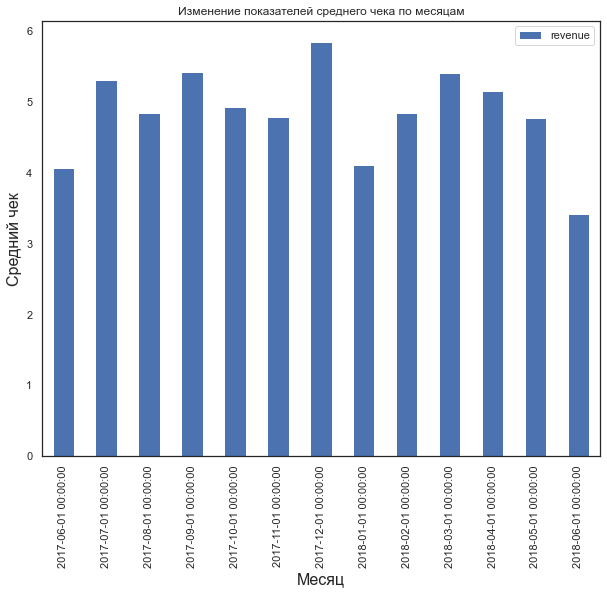

In [61]:
average_check.plot(kind='bar', figsize = (10,8))
plt.xlabel('Месяц',fontsize=16)
plt.ylabel('Средний чек',fontsize=16)
plt.title('Изменение показателей среднего чека по месяцам')
plt.show()

In [62]:
average_check_mean = float(average_check.mean())
print('Средний чек:', format(average_check_mean, '.2f'))

Средний чек: 4.84


---
- Самый высокий показатель среднего чека наблюдается в декабре 2017 года: 5,85
- Самый низкий показатель среднего чека наблюдается в июне 2018 года: 3,42
- Средний чек составляет 4.84

---

#### LTV

In [63]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [64]:
cohort_sizes = (
    orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [65]:
cohorts_new = (
    orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_new.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [66]:
report = pd.merge(cohort_sizes, cohorts_new, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [67]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
)/ np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [68]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2).cumsum(axis=1)

output.fillna('')



age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


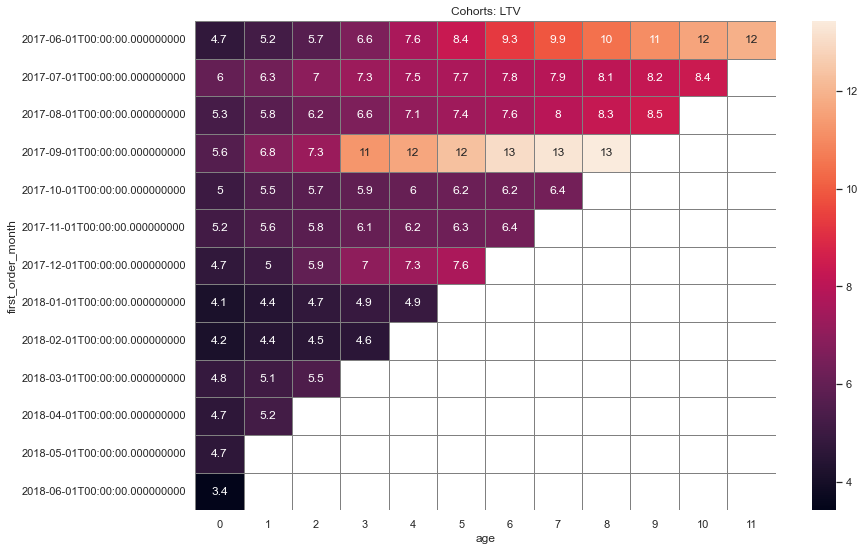

In [69]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

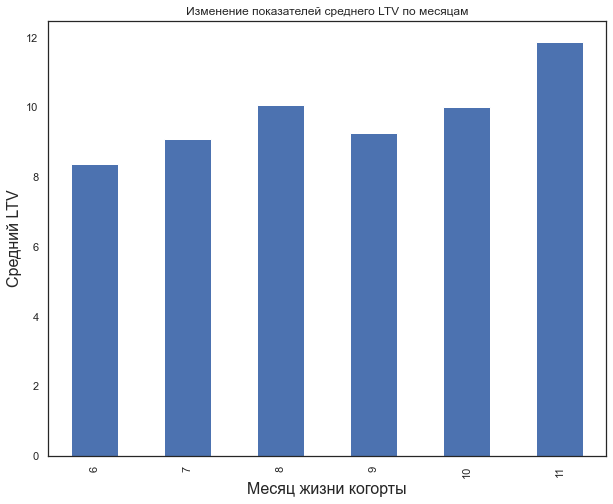

In [70]:
output_6month = output.mean(axis = 0).fillna('')[6:]
output_6month.plot(kind='bar', figsize = (10,8))
plt.xlabel('Месяц жизни когорты',fontsize=16)
plt.ylabel('Средний LTV',fontsize=16)
plt.title('Изменение показателей среднего LTV по месяцам')
plt.show()

In [71]:
print('Средний LTV по 6 месяцу жизни когорт:', output[6].mean())

Средний LTV по 6 месяцу жизни когорт: 8.385


---
- По тепловой карте видно, что когорта 2017-09-01 имеет самые высокие показатели LTV. Они сильно увеличиваются с 4 месяца жизни когторты, то есть в декабре.
- Средний LTV по 6 месяцу жизни когорт: 8.385.

----

### Маркетинговые метрики

#### Расходы на маркетинг

In [72]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [73]:
source_sum = costs.groupby('source_id')['costs'].sum()
source_sum = source_sum.to_frame()
source_sum

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


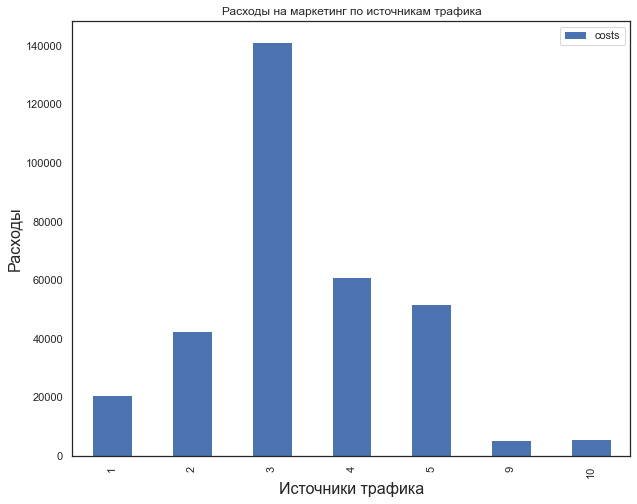

In [74]:
source_sum.plot(kind='bar', figsize = (10,8))
plt.xlabel('Источники трафика',fontsize=16)
plt.ylabel('Расходы',fontsize=16)
plt.title('Расходы на маркетинг по источникам трафика')
plt.show()

In [75]:
print('Общие затраты на маркетинг:', format(source_sum['costs'].sum(), '.2f'))

Общие затраты на маркетинг: 329131.62


---
- Общие затраты на маркетинг составляют 329131.62
- Источник трафика под номером три является самым затратным

---

In [76]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [77]:
costs_per_month = costs.groupby('dt_month')['costs'].sum().to_frame()
costs_per_month.head()

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


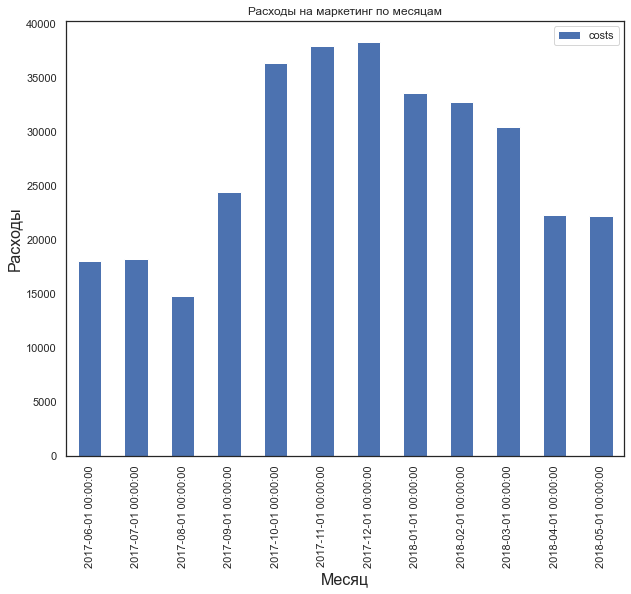

In [78]:
costs_per_month.plot(kind='bar', figsize = (10,8))
plt.xlabel('Месяц',fontsize=16)
plt.ylabel('Расходы',fontsize=16)
plt.title('Расходы на маркетинг по месяцам')
plt.show()

---
- Самые высокие траты на маркетинг приходятся на октябрь, ноябрь и декабрь
- Самые низкие затраты в летние месяцы
- Я думаю, что в зимнее время года увеличивается количество мероприятий.Так как люди меньше стали проводить время на улице, не ездят в отпуска и т.д., увеличивается спрос на подобные развлечения. Плюс ко всему зимой возрастает количество мероприятий в новогодней тематике. А чтобы люди шли на эти мероприятия, нужно их привлекать. Поэтому в осенне-зимние месяцы траты на маркетинг получаются повыше, чем в летние.

---

#### Стоимость привлечения клиента

In [79]:
visits_orders = visits.merge(orders, on='uid')

In [80]:
orders_new = orders
orders_new['first_order_dt'] = orders_new['first_order_date'].astype('datetime64[D]')
first_source_date_by_users = visits.groupby(['uid','source_id'])['start_ts'].min().reset_index()


orders_new = orders_new.merge(first_source_date_by_users, on='uid')
orders_new = (
    orders_new.groupby(['first_order_dt', 'source_id'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

cac_by_sources = pd.merge(orders_new, costs, left_on=['source_id','first_order_dt'], right_on=['source_id','dt'])
cac_by_sources['cac'] = cac_by_sources['costs'] / cac_by_sources['uid']
cac_by_sources

,first_order_dt,source_id,uid,dt,costs,dt_month,cac
0,2017-06-01,1,21,2017-06-01,75.20,2017-06-01,3.580952
1,2017-06-01,2,27,2017-06-01,132.56,2017-06-01,4.909630
2,2017-06-01,3,46,2017-06-01,349.38,2017-06-01,7.595217
3,2017-06-01,4,22,2017-06-01,76.74,2017-06-01,3.488182
4,2017-06-01,5,26,2017-06-01,73.24,2017-06-01,2.816923
...,...,...,...,...,...,...,...
2499,2018-05-31,3,137,2018-05-31,822.30,2018-05-01,6.002190
2500,2018-05-31,4,95,2018-05-31,492.54,2018-05-01,5.184632
2501,2018-05-31,5,46,2018-05-31,398.04,2018-05-01,8.653043
2502,2018-05-31,9,9,2018-05-31,27.37,2018-05-01,3.041111


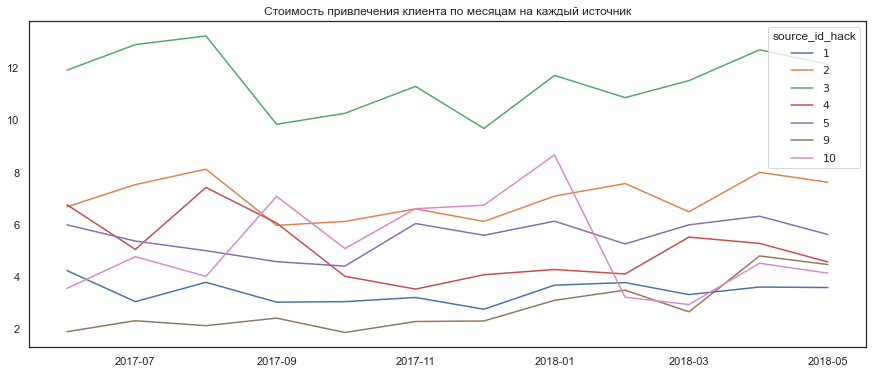

In [81]:
cac_by_sources = cac_by_sources.pivot_table(
        index=['dt_month', 'source_id'], values='cac', aggfunc='mean'
    ).round(2).reset_index()

cac_by_sources["source_id_hack"] = ["$%s$" % x for x in cac_by_sources["source_id"]]

plt.figure(figsize=(15, 6))
sns.lineplot(x='dt_month', y='cac', hue='source_id_hack', data=cac_by_sources)
plt.xlabel('',fontsize=16)
plt.ylabel('',fontsize=16)
 
plt.title('Стоимость привлечения клиента по месяцам на каждый источник')
plt.xlabel('')
plt.ylabel('')
plt.show()


In [82]:
(cac_by_sources.groupby(['source_id'])
    .agg({'cac': 'mean'}).reset_index())

,source_id,cac
0,1,3.435833
1,2,7.002500
2,3,11.509167
3,4,5.066667
4,5,5.535000
5,9,2.823333
6,10,5.122500


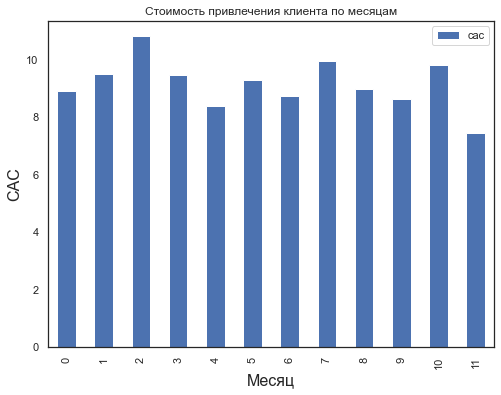

In [83]:
buyers = (
    visits_orders.groupby(['first_order_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

month_costs = (costs.rename({'dt_month': 'first_order_month'}, axis=1).groupby(['first_order_month'])
    .agg({'costs': 'sum'}).reset_index())
month_costs = pd.merge(buyers, month_costs, on=['first_order_month'])
month_costs['cac'] = month_costs['costs'] / month_costs['uid']
month_costs['cac'].to_frame().plot(kind='bar', figsize = (8,6))
plt.xlabel('Месяц',fontsize=16)
plt.ylabel('CAC',fontsize=16)
plt.title('Стоимость привлечения клиента по месяцам')
plt.show()

In [84]:
print('Минимальные затраты на привлечение клиента:', format(month_costs['cac'].min(), '.2f'))
print('Максимальные затраты на привлечение клиента:', format(month_costs['cac'].max(), '.2f'))
print('Средний показатель CAC:', round(costs['costs'].sum() / orders['uid'].nunique(), 2))

Минимальные затраты на привлечение клиента: 7.44
Максимальные затраты на привлечение клиента: 10.80
Средний показатель CAC: 9.01


---
- Максимальный показатель CAC в августе 2017 года: 10.80
- Так же высокие показатели наблюдаются в январе и апреле 2018 года
- Самый низкий показатель CAC в мае 2018 года: 7.44
- Самый затратный источник трафика 3, затраты на привлечение клиента составляют 11.50
- Средний показатель CAC: 9.01

---

In [85]:
round(costs['costs'].sum() / orders['uid'].nunique(), 2)

9.01

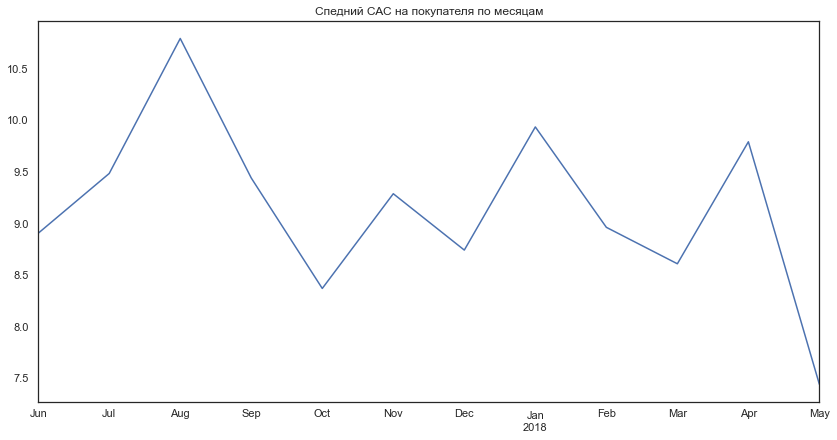

In [86]:
# Найдем время первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

# посчитаем средний САС по месяцам
СAC_by_month = pd.merge(costs.groupby('dt_month').agg({'costs': 'sum'}), 
                        first_orders.groupby('first_order_month').agg({'uid': 'nunique'}), 
                        left_index=True, 
                        right_index=True)
СAC_by_month['CAC'] = СAC_by_month['costs']  / СAC_by_month['uid'] 

СAC_by_month['CAC'].plot(figsize=(14,7), title='Спедний САС на покупателя по месяцам');

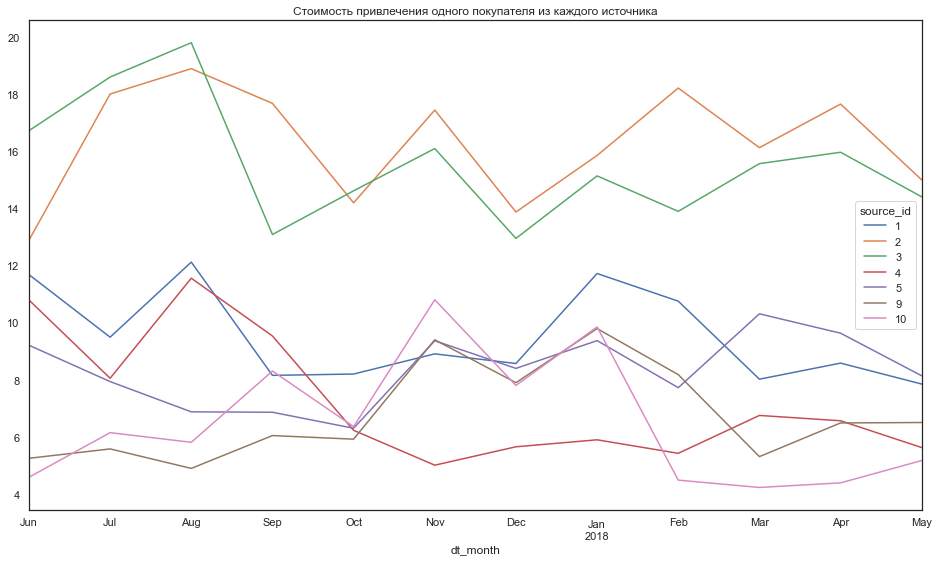

In [87]:
# найдем, первый рекламный источник, из которого пришел каждый пользователь
first_source = visits.sort_values('start_ts').groupby('uid').first()
first_source = first_source[['source_id']]
buyers = pd.merge(first_orders, first_source, left_on='uid', right_index=True)

#посчитаем покупателей
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

#добавим расходы
cac_source = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
cac_source['costs_per_buyer'] = cac_source['costs']/cac_source['n_buyers']

#построим график
cac_source.pivot_table(index=['dt_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(
    figsize=(16,9), title='Стоимость привлечения одного покупателя из каждого источника')
plt.show()

In [88]:
(cac_source.groupby(['source_id']).agg({'costs_per_buyer': 'mean'}).reset_index())

,source_id,costs_per_buyer
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


#### Рентабельность инвестиций в маркетинг

In [89]:
visits.head(3)


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_hour,session_duration_sec,first_visit_date_time,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,17,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,2017-12-01,0.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,16,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,2018-02-01,0.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,1,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,0.0


In [90]:
orders.head(3)

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,first_order_dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01


In [91]:
visits_orders_cohorts = visits_orders.groupby(['first_order_month', 'source_id'])['uid'].nunique().to_frame()
visits_orders_cohorts

uid
first_order_month source_id     
2017-06-01        1          401
                  2          457
                  3          874
                  4          644
                  5          571
...                          ...
2018-05-01        4          987
                  5          703
                  9           98
                  10         164
2018-06-01        4            1

[86 rows x 1 columns]

In [92]:
visits_orders_revenue = visits_orders.groupby(['first_order_month', 'order_month', 'source_id'])['revenue'].sum().to_frame()
visits_orders_revenue = visits_orders_revenue.reset_index()
visits_orders_revenue

,first_order_month,order_month,source_id,revenue
0,2017-06-01,2017-06-01,1,51524.95
1,2017-06-01,2017-06-01,2,49626.01
2,2017-06-01,2017-06-01,3,7467.82
3,2017-06-01,2017-06-01,4,13644.17
4,2017-06-01,2017-06-01,5,23407.59
...,...,...,...,...
541,2018-05-01,2018-05-01,4,6864.09
542,2018-05-01,2018-05-01,5,4812.78
543,2018-05-01,2018-05-01,9,560.68
544,2018-05-01,2018-05-01,10,1390.99


In [93]:
romi_cohorts = pd.merge(visits_orders_cohorts, visits_orders_revenue, on=['first_order_month', 'source_id'])
romi_cohorts['age'] = (
    romi_cohorts['order_month'] - romi_cohorts['first_order_month']
)/ np.timedelta64(1, 'M')
romi_cohorts['age'] = romi_cohorts['age'].round().astype('int')
romi_cohorts['ltv'] = romi_cohorts['revenue'] / romi_cohorts['uid']
romi_cohorts

,first_order_month,source_id,uid,order_month,revenue,age,ltv
0,2017-06-01,1,401,2017-06-01,51524.95,0,128.491147
1,2017-06-01,1,401,2017-07-01,72623.86,1,181.106883
2,2017-06-01,1,401,2017-08-01,36449.13,2,90.895586
3,2017-06-01,1,401,2017-09-01,160020.09,3,399.052594
4,2017-06-01,1,401,2017-10-01,105858.06,4,263.985187
...,...,...,...,...,...,...,...
541,2018-05-01,4,987,2018-05-01,6864.09,0,6.954498
542,2018-05-01,5,703,2018-05-01,4812.78,0,6.846060
543,2018-05-01,9,98,2018-05-01,560.68,0,5.721224
544,2018-05-01,10,164,2018-05-01,1390.99,0,8.481646


In [94]:
costs = costs.rename({'dt_month': 'first_order_month'}, axis=1)
costs.head(3)

,source_id,dt,costs,first_order_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01


In [95]:
costs_grouped = costs.groupby(['source_id', 'first_order_month'])['costs'].sum().to_frame()
costs_grouped

costs
source_id first_order_month         
1         2017-06-01         1125.61
          2017-07-01         1072.88
          2017-08-01          951.81
          2017-09-01         1502.01
          2017-10-01         2315.75
...                              ...
10        2018-01-01          614.35
          2018-02-01          480.88
          2018-03-01          526.41
          2018-04-01          388.25
          2018-05-01          409.86

[84 rows x 1 columns]

In [96]:
romi_cohorts = romi_cohorts.join(costs_grouped, on=['source_id', 'first_order_month'])
romi_cohorts['cac'] = romi_cohorts['costs'] / romi_cohorts['uid']
romi_cohorts['romi'] = romi_cohorts['ltv'] / romi_cohorts['cac']
romi_cohorts

,first_order_month,source_id,uid,order_month,revenue,age,ltv,costs,cac,romi
0,2017-06-01,1,401,2017-06-01,51524.95,0,128.491147,1125.61,2.807007,45.775135
1,2017-06-01,1,401,2017-07-01,72623.86,1,181.106883,1125.61,2.807007,64.519558
2,2017-06-01,1,401,2017-08-01,36449.13,2,90.895586,1125.61,2.807007,32.381669
3,2017-06-01,1,401,2017-09-01,160020.09,3,399.052594,1125.61,2.807007,142.162996
4,2017-06-01,1,401,2017-10-01,105858.06,4,263.985187,1125.61,2.807007,94.045060
...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,4,987,2018-05-01,6864.09,0,6.954498,4214.21,4.269716,1.628796
542,2018-05-01,5,703,2018-05-01,4812.78,0,6.846060,3669.56,5.219858,1.311541
543,2018-05-01,9,98,2018-05-01,560.68,0,5.721224,362.17,3.695612,1.548113
544,2018-05-01,10,164,2018-05-01,1390.99,0,8.481646,409.86,2.499146,3.393817


In [97]:
romi_cohorts.query('source_id == 1')

,first_order_month,source_id,uid,order_month,revenue,age,ltv,costs,cac,romi
0,2017-06-01,1,401,2017-06-01,51524.95,0,128.491147,1125.61,2.807007,45.775135
1,2017-06-01,1,401,2017-07-01,72623.86,1,181.106883,1125.61,2.807007,64.519558
2,2017-06-01,1,401,2017-08-01,36449.13,2,90.895586,1125.61,2.807007,32.381669
3,2017-06-01,1,401,2017-09-01,160020.09,3,399.052594,1125.61,2.807007,142.162996
4,2017-06-01,1,401,2017-10-01,105858.06,4,263.985187,1125.61,2.807007,94.045060
...,...,...,...,...,...,...,...,...,...,...
504,2018-03-01,1,676,2018-04-01,70857.47,1,104.818743,1893.09,2.800429,37.429531
505,2018-03-01,1,676,2018-05-01,25316.23,2,37.450044,1893.09,2.800429,13.372967
524,2018-04-01,1,391,2018-04-01,12731.75,0,32.562020,1327.49,3.395115,9.590844
525,2018-04-01,1,391,2018-05-01,23889.62,1,61.098772,1327.49,3.395115,17.996083


In [98]:
romi = romi_cohorts.reset_index(drop=False, inplace=False)
romi["source_id_hack"] = ["$%s$" % x for x in romi["source_id"]]
romi

,index,first_order_month,source_id,uid,order_month,revenue,age,ltv,costs,cac,romi,source_id_hack
0,0,2017-06-01,1,401,2017-06-01,51524.95,0,128.491147,1125.61,2.807007,45.775135,$1$
1,1,2017-06-01,1,401,2017-07-01,72623.86,1,181.106883,1125.61,2.807007,64.519558,$1$
2,2,2017-06-01,1,401,2017-08-01,36449.13,2,90.895586,1125.61,2.807007,32.381669,$1$
3,3,2017-06-01,1,401,2017-09-01,160020.09,3,399.052594,1125.61,2.807007,142.162996,$1$
4,4,2017-06-01,1,401,2017-10-01,105858.06,4,263.985187,1125.61,2.807007,94.045060,$1$
...,...,...,...,...,...,...,...,...,...,...,...,...
541,541,2018-05-01,4,987,2018-05-01,6864.09,0,6.954498,4214.21,4.269716,1.628796,$4$
542,542,2018-05-01,5,703,2018-05-01,4812.78,0,6.846060,3669.56,5.219858,1.311541,$5$
543,543,2018-05-01,9,98,2018-05-01,560.68,0,5.721224,362.17,3.695612,1.548113,$9$
544,544,2018-05-01,10,164,2018-05-01,1390.99,0,8.481646,409.86,2.499146,3.393817,$10$


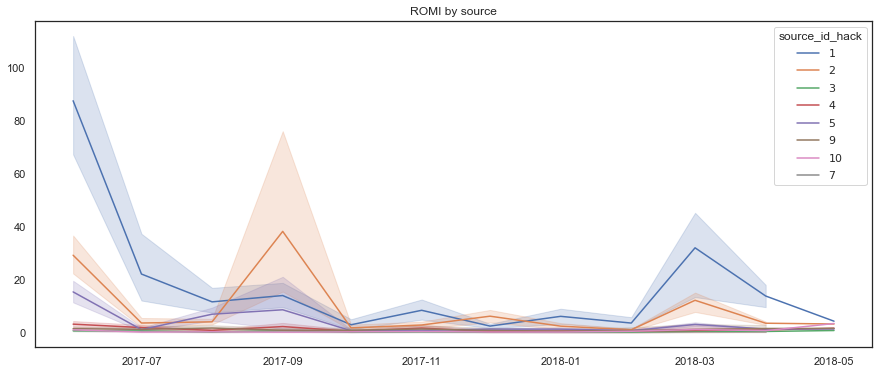

In [99]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='first_order_month', y='romi', hue='source_id_hack', data=romi)
plt.xlabel('',fontsize=16)
plt.ylabel('',fontsize=16)
 
plt.title('ROMI by source')
plt.xlabel('')
plt.ylabel('')
plt.show()

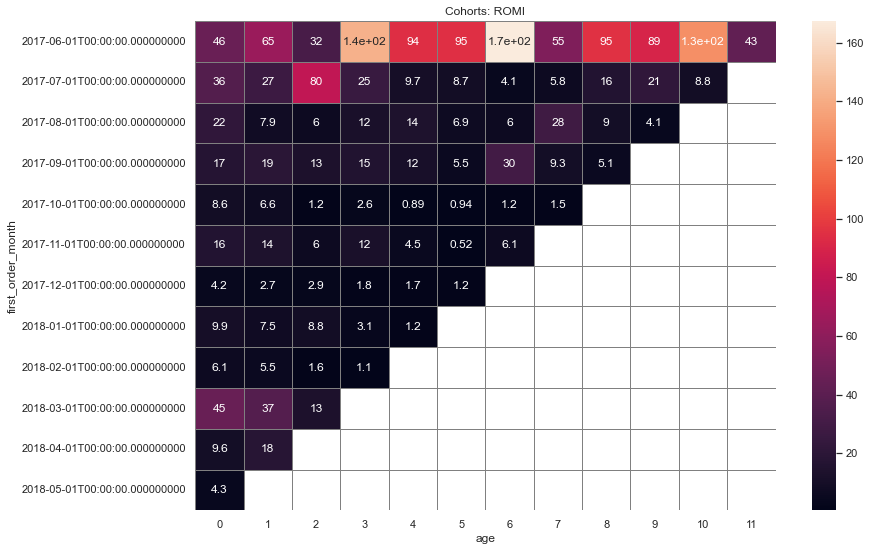

In [100]:
output = romi.query('source_id == 1').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 


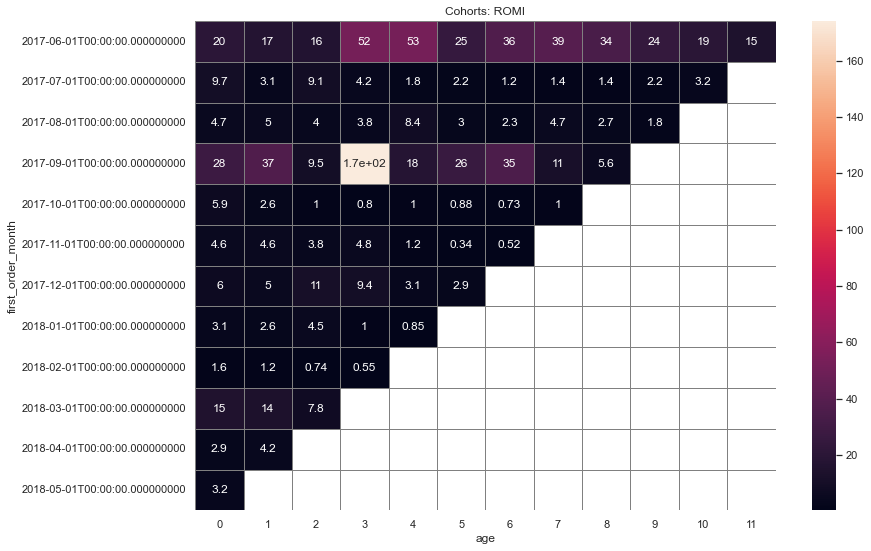

In [101]:
output = romi.query('source_id == 2').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

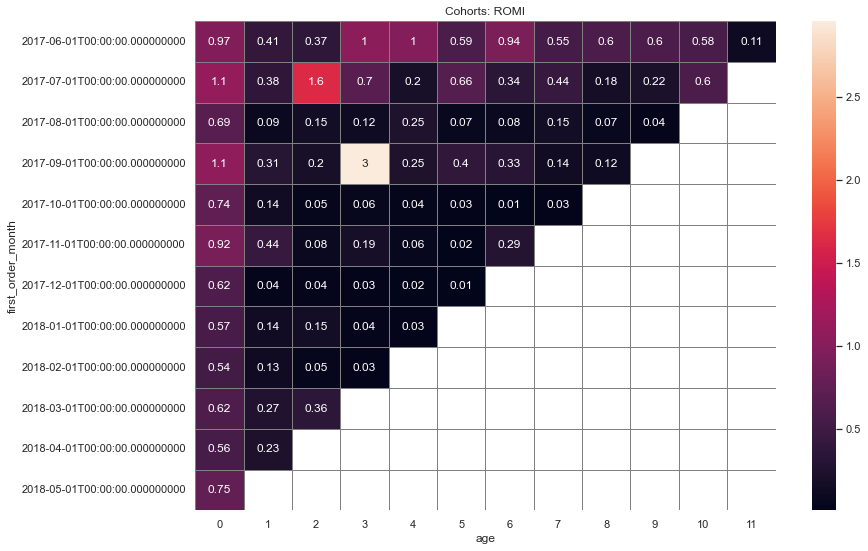

In [102]:
output = romi.query('source_id == 3').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

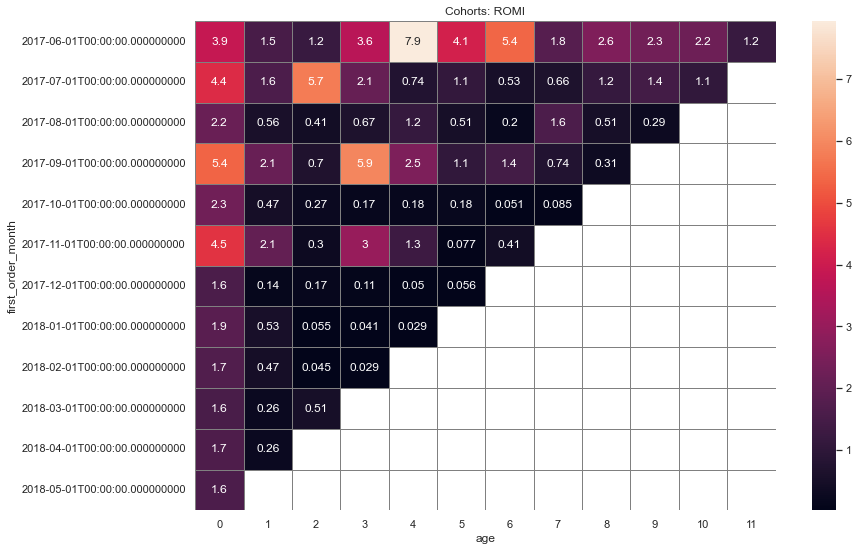

In [103]:
output = romi.query('source_id == 4').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    )

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

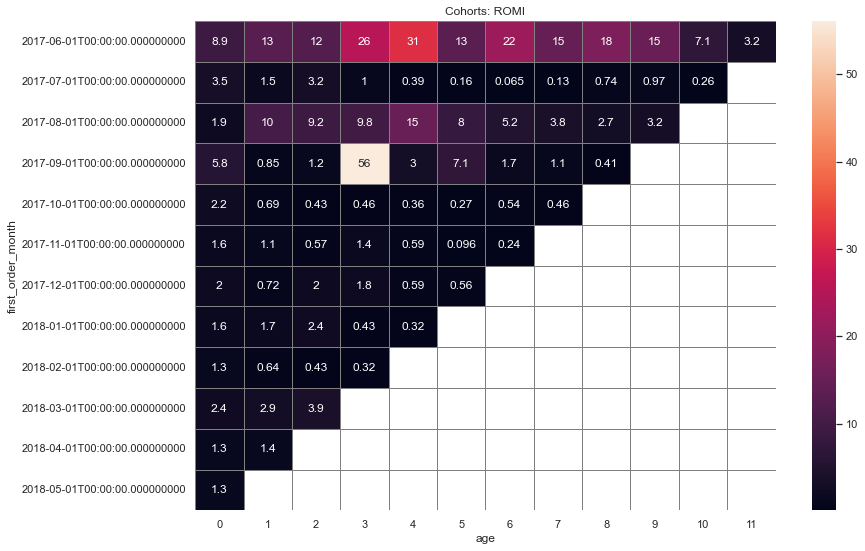

In [104]:
output = romi.query('source_id == 5').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    )

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

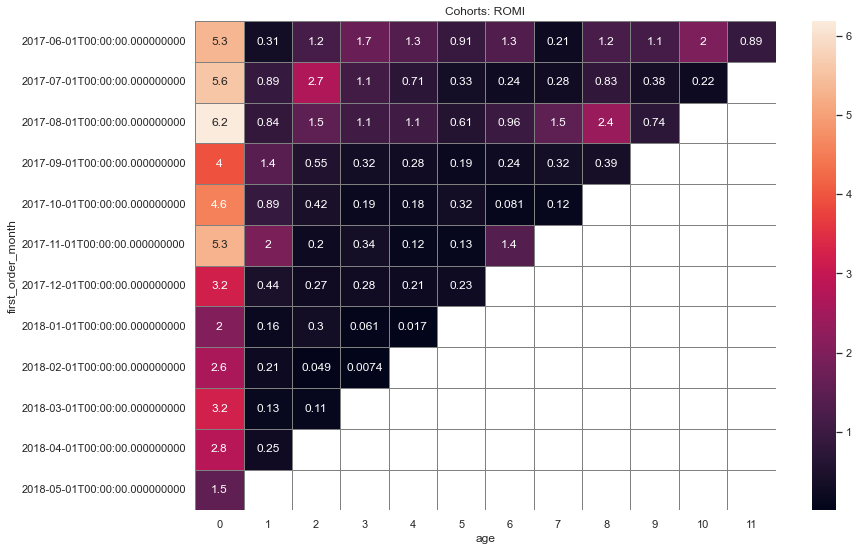

In [105]:
output = romi.query('source_id == 9').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    )

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

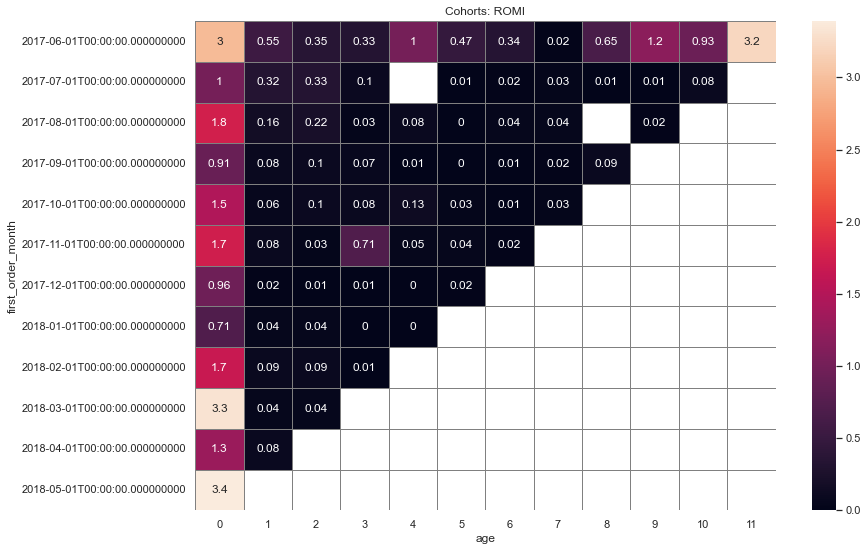

In [106]:
output = romi.query('source_id == 10').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

In [107]:
ltv_by_source = romi.groupby('source_id')['ltv'].mean().to_frame()
ltv_by_source

,ltv
source_id,
1,65.751086
2,64.526487
3,3.864338
4,7.361037
5,22.969237
7,1.220000
9,2.149087
10,1.389756


---
- Рассчитала ROMI по когортам в разрезе источников, отобразила на графике.
- Самые высокие показатели LTV у 1-го, 2-го и 5-го источника.
- Сильные всплески окупаемости можно наблюдать у 1-го источника в марте 2018 года и у 2-го источника в сентябре 2017 года.

---

In [108]:
#добавим месяц заказа
orders['order_month'] = orders['order_month'].astype('datetime64[M]')

#добавим месяц и revenue в покупателей
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue,on = 'uid')

#сгруппируем по источнику и первому месяцу заказа, здесь нужны только уникальные uid
cohort_sizes_t = (
    buyers.groupby(['source_id', 'first_order_month'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

#сгруппируем по источнику и первому месяцу заказа, проссумируем revenue
cohorts_revenue_t = (
    buyers.groupby(['source_id', 'first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

# объединим таблицы, посчитаем age и ltv
report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
report_romi['age'] = (
    report_romi['order_month'] - report_romi['first_order_month']
) / np.timedelta64(1, 'M')
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

#добавим таблицу costs, посчитаем сас и romi
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
report_romi = pd.merge(report_romi,costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
report_romi = report_romi.drop(['costs_month'], axis = 1) 
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
display(report_romi.head())

,source_id,first_order_month,n_buyers,order_month,gp,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,1,2.184105,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2,2.207526,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,3,3.759158,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,4,4.269474,1125.61,5.924263,0.720676


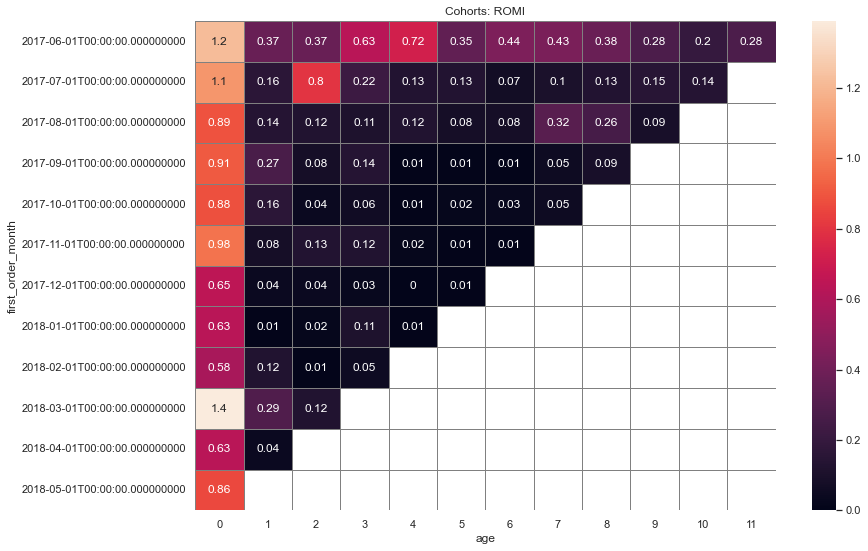

In [109]:
output = report_romi.query('source_id == 1').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

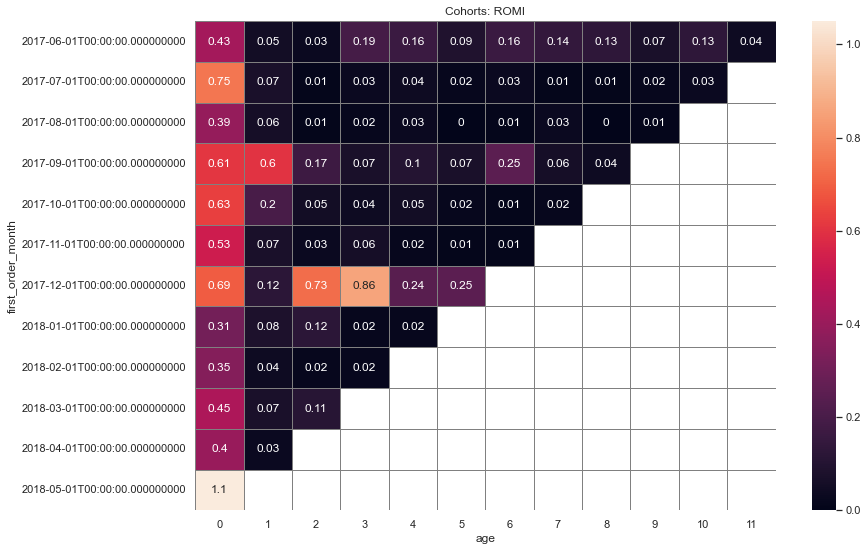

In [110]:
output = report_romi.query('source_id == 2').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

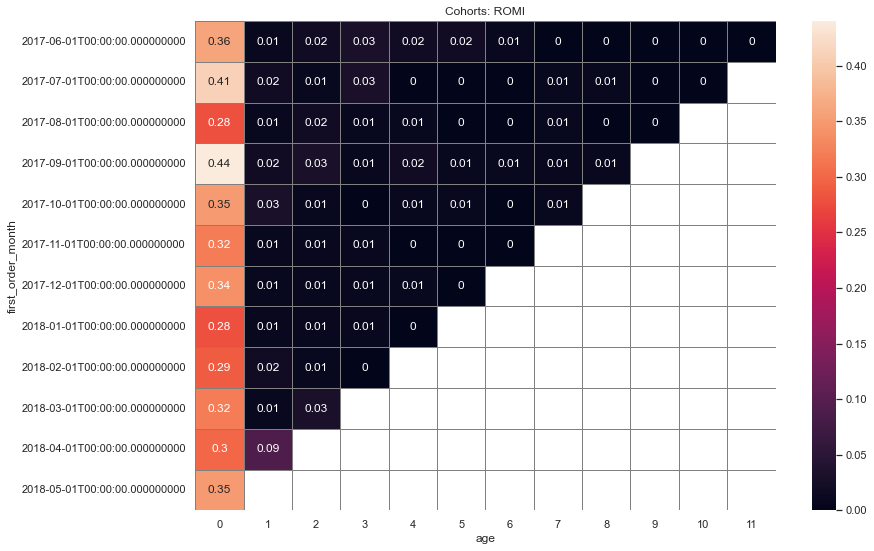

In [111]:
output = report_romi.query('source_id == 3').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

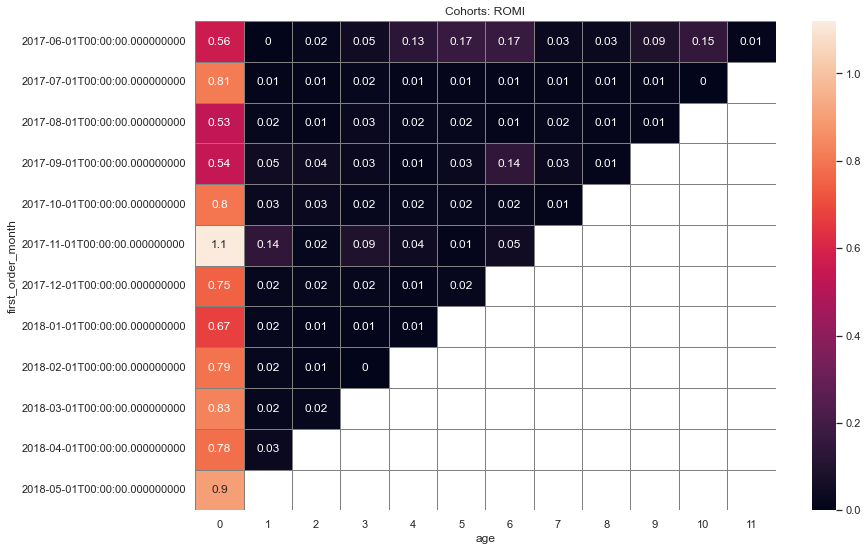

In [112]:
output = report_romi.query('source_id == 4').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

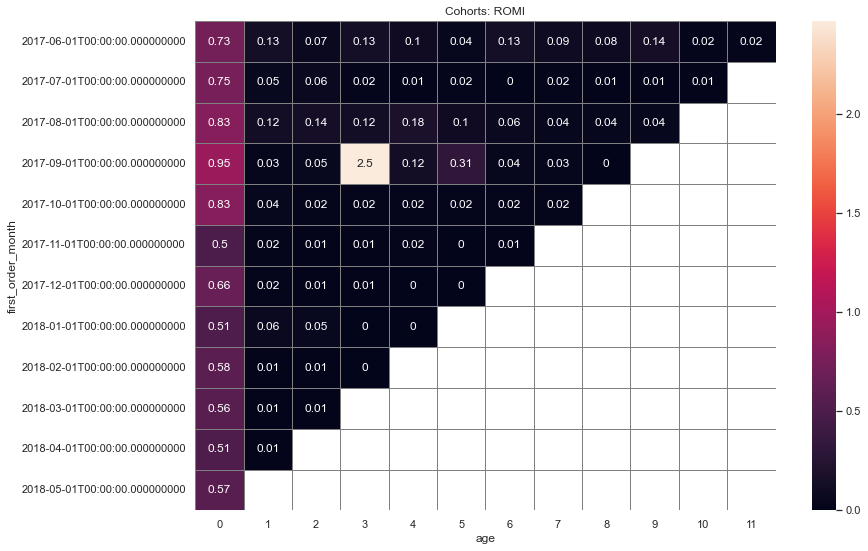

In [113]:
output = report_romi.query('source_id == 5').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

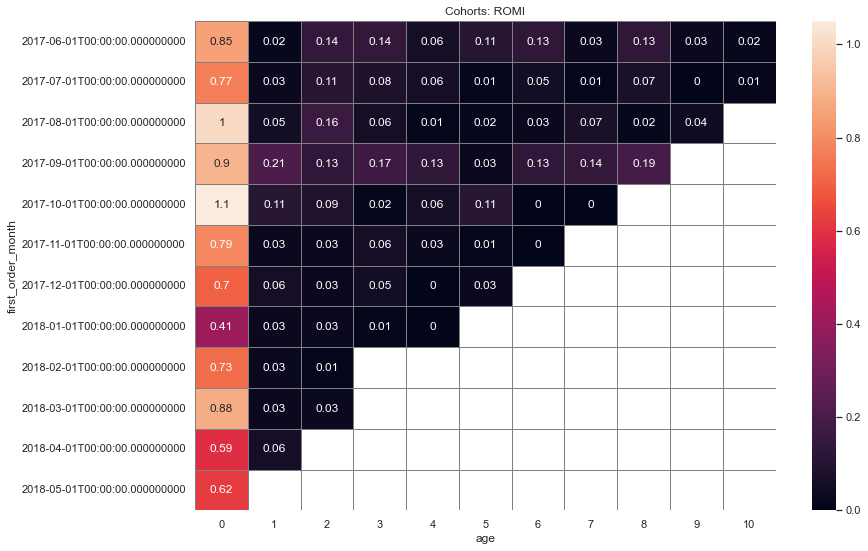

In [114]:
output = report_romi.query('source_id == 9').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

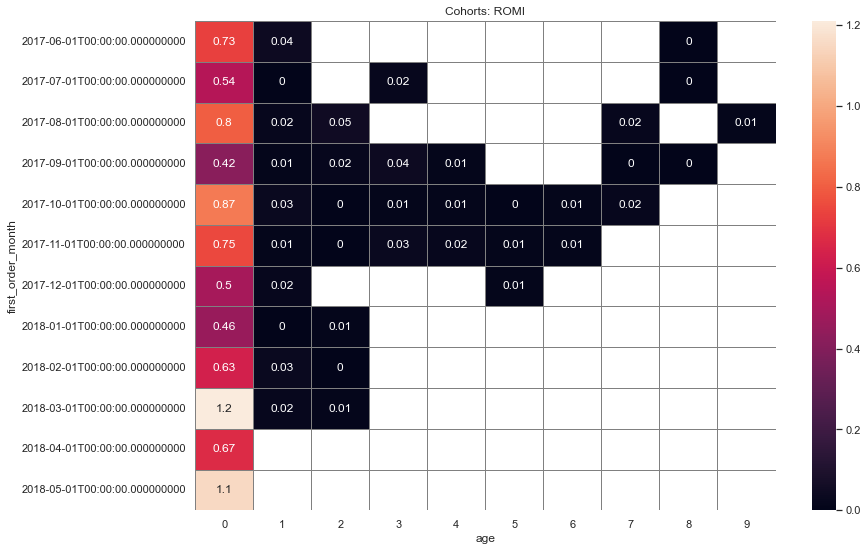

In [115]:
output = report_romi.query('source_id == 10').pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).round(2)

output.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray'); 

## Вывод

1. Опираясь на показатели ROMI(окупаемости инвестиций в маркетинг), самыми перспективными источниками трафика можно считать 1 и 2. Судя по графику изменения показателей метрики во времени, они дают всплески окупаемости раз в несколько месяцев. В отличае от остальных источников, показатели которых не растут со временем. 
    Так же можно обратить внимание на затраты на маркетинг по каждому источнику трафика. Самым затратным является третий, хотя окупаемость его не такая большая. 
    Из этого можно сделать выводы, что источники трафика под номерами 1 и 2 являются самыми удачными и на них стоит сделать упор в будущем.
    
    *Дополнение: Самые высокие показатели ценности клиента у 1-го, 2-го и 5-го источников трафика. Так что маркетологам стоит сделать упор так же и на 5-й источник трафика.*
    
    
2. **Маркетинговые метрики** 

    По маркетинговым метрикам видно, что дороже всего привлечение клиентов обходится в августе, январе и апреле. Мне такое распределение затрат кажется не целесообразным, ведь пользовательская активность в эти месяцы ниже, чем в остальные. Однако, возможно, такие траты объясняются попыткой удержать активность пользователей на том же уровне, что и в активные месяцы. 
    Так же наблюдаются неоправданно высокие затраты на источник трафика с низким показателем окупаемости. 
    
    **Продуктовые метрики**
    
    Зимние месяцы более благоприятные для походов на мероприятия. Всплески количества новых пользователей приходятся на ноябрь и декабрь, а в июне, июле и августе приходит меньше всего новых пользователей.
    В среднем в день сайт Яндекс.Афиши посещают 41 человек. При этом пик активности происходит с 12:00 до 14:00, то есть в обеденное время, и с 21:00 до 22:00, когда люди уже обычно находятся дома и готовятся ко сну. В среднем один пользователь может зайти на сайт 1 раз в день.
    В среднем сессия длится 1 минуту, что говорит либо о самом удобном способе покупки билетов, либо о проблеме многих пользователей с невозможностью быстро разобраться в сайте, и они в итоге так и не доходят до покупки. 
    Из-за сезонности всплесков активности показатель коэффициента удержания клиентов меняется не равномерно.Средний показатель Retention Rate на второй месяц жизни когорт: **6.5%**. Думаю, что это нормально для второго месяца, так как билеты на мероприятия необходимы не каждый месяц.
    
    **Метрики электронной коммерции**
    
    Обычно пользователь совершает покупку с первого же захода на сайт и тратит на это всего 1 минуту(либо я что-то неправильно посчитала, либо у Яндекс.Афиши действительно самый удобный сайт в мире). В среднем один пользователь совершает 1 покупку за 6 месяцев. Показатели количества продаж и общей выручки с них растут с сентября по декабрь, что понятно, ведь спрос на мероприятия растет в холодные месяцы. И подтвержают нам это показатели среднего чека: максимальные в декабре и минимальные в июне.
    

3. Самые перспективные для компании когорты клиентов: 2017-06-01, 2017-09-01, 2017-12-01. Так как показатели их ценности(LTV) растут быстрее, скачки роста больше, чем у других когорт.